<a href="https://colab.research.google.com/github/karthik40121/OIB-SIP/blob/main/PROJECT_2_PROPOSAL_LEVEL_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving WineQT.csv to WineQT.csv


In [ ]:
data = pd.read_csv('WineQT.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
# Dataset shape
print("Shape:", data.shape)

# Dataset info
data.info()

# Check missing values
print("\nMissing Values:\n", data.isnull().sum())

# Drop unnecessary column if present
if 'Id' in data.columns:
    data.drop('Id', axis=1, inplace=True)


Shape: (1143, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB

Missing Values:
 fixed acidity           0
volatile acid

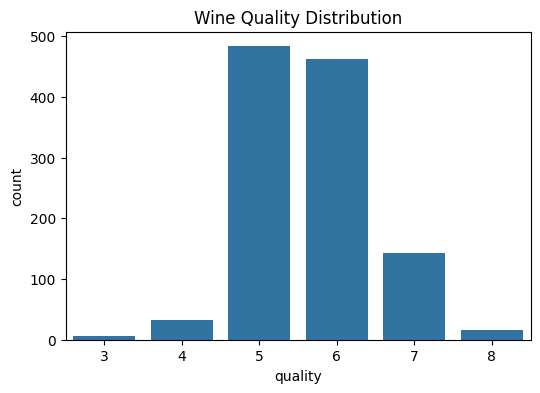

In [ ]:
# Distribution of wine quality
plt.figure(figsize=(6,4))
sns.countplot(x='quality', data=data)
plt.title("Wine Quality Distribution")
plt.show()


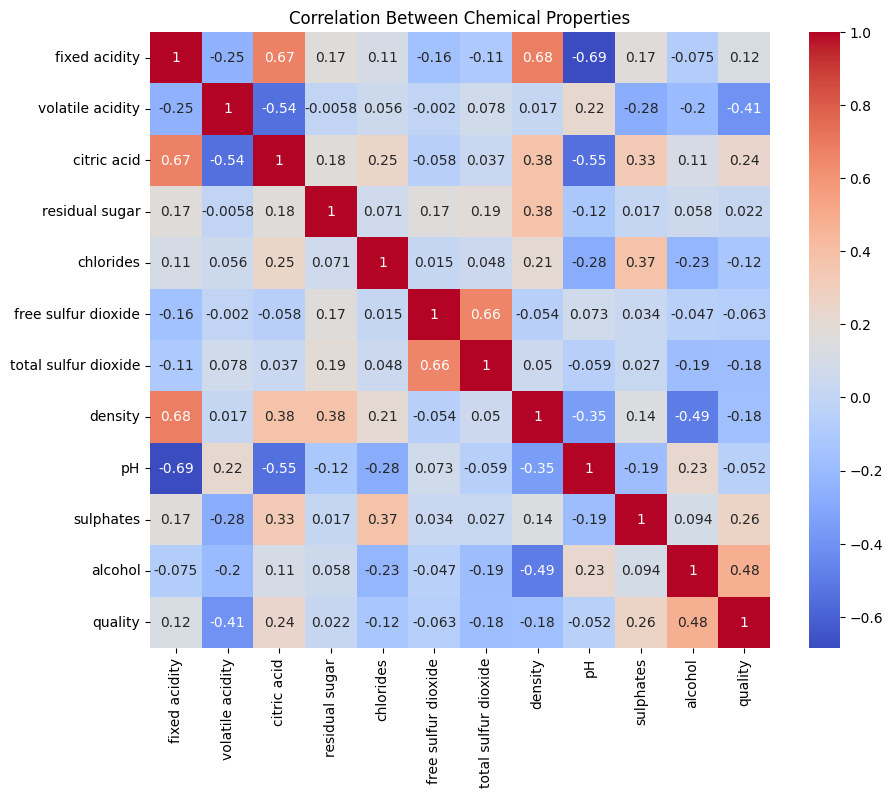

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Chemical Properties")
plt.show()


In [ ]:
X = data.drop('quality', axis=1)
y = data['quality'].apply(lambda q: 1 if q >= 7 else 0)

print("Good wines:", y.sum())
print("Bad wines:", len(y) - y.sum())


Good wines: 159
Bad wines: 984


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


Random Forest Accuracy: 0.9213973799126638
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       197
           1       0.79      0.59      0.68        32

    accuracy                           0.92       229
   macro avg       0.86      0.78      0.82       229
weighted avg       0.92      0.92      0.92       229



In [ ]:
sgd = SGDClassifier(random_state=42)
sgd.fit(X_train_scaled, y_train)

sgd_pred = sgd.predict(X_test_scaled)

print("SGD Classifier Accuracy:", accuracy_score(y_test, sgd_pred))
print(classification_report(y_test, sgd_pred))


SGD Classifier Accuracy: 0.8820960698689956
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       197
           1       0.57      0.62      0.60        32

    accuracy                           0.88       229
   macro avg       0.75      0.77      0.76       229
weighted avg       0.89      0.88      0.88       229



In [ ]:
svc = SVC(kernel='rbf')
svc.fit(X_train_scaled, y_train)

svc_pred = svc.predict(X_test_scaled)

print("SVC Accuracy:", accuracy_score(y_test, svc_pred))
print(classification_report(y_test, svc_pred))


SVC Accuracy: 0.8995633187772926
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       197
           1       0.76      0.41      0.53        32

    accuracy                           0.90       229
   macro avg       0.84      0.69      0.74       229
weighted avg       0.89      0.90      0.89       229



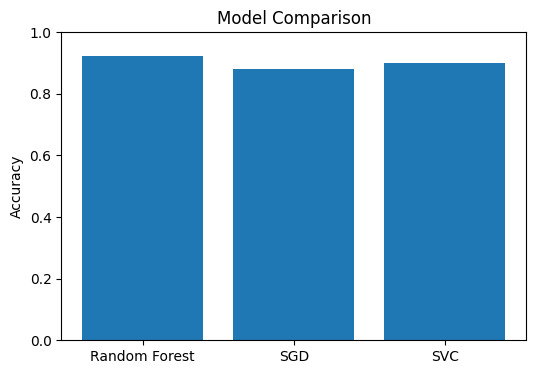

In [ ]:
models = ['Random Forest', 'SGD', 'SVC']
accuracies = [
    accuracy_score(y_test, rf_pred),
    accuracy_score(y_test, sgd_pred),
    accuracy_score(y_test, svc_pred)
]

plt.figure(figsize=(6,4))
plt.bar(models, accuracies)
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.ylim(0,1)
plt.show()


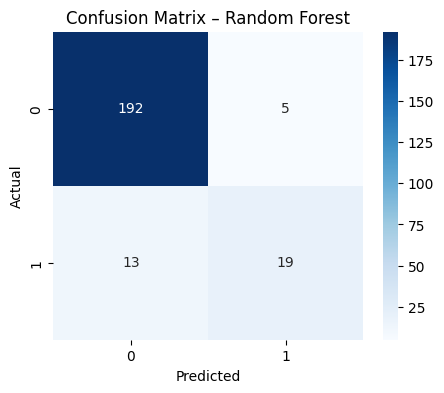

In [ ]:
cm = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Random Forest")
plt.show()
